In [1]:
import matplotlib.pyplot as plot
import gudhi

# rips_on_tore3D_1307.pers obtained from write_persistence_diagram method
persistence_file='/home/bazyli/gitworkspace/gitBKrp/persistence/pcodebooks/rawdata/exp01_synthetic/pd_gauss_0_1/Circle/11.h5.pc.simba.1.00001_3.persistence'
a=gudhi.plot_persistence_diagram(persistence_file=persistence_file,
    legend=True)
plot.show()


file /home/bazyli/gitworkspace/gitBKrp/persistence/pcodebooks/rawdata/exp01_synthetic/pd_gauss_0_1/Circle/11.h5.pc.simba.1.00001_3.persistence not found.


In [213]:
import numpy as np
arr = gudhi.read_persistence_intervals_in_dimension(persistence_file, only_this_dim=1)

file /home/bazyli/gitworkspace/gitBKrp/persistence/pcodebooks/rawdata/exp01_synthetic/pd_gauss_0_1/Circle/11.h5.pc.simba.1.00001_3.persistence not set or not found.


In [214]:
from gudhi.representations.preprocessing import BirthPersistenceTransform

In [188]:
arr = np.reshape(arr, (1,-1,2))

In [100]:
transformer = BirthPersistenceTransform()

In [191]:
arr = transformer.transform(arr)

In [203]:
X = np.array(arr)

In [207]:
X = X.reshape((2,-1,2))

In [210]:
X.shape

(2, 17, 2)

In [220]:
ps = RandomPDSampler(3, lambda x: x**2)
ps.transform(X)

array([[0.0427533, 0.1304427],
       [0.0283355, 0.0229157],
       [0.0296474, 0.0163507]])

# Matlab data loading and processing

In [1]:
import numpy as np
import scipy.io
from gudhi.representations.preprocessing import BirthPersistenceTransform, DiagramScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from preprocessing import *
from persistent_bow import *
from visualization import *

In [2]:
data_path = "./pd.mat"
data_mat = scipy.io.loadmat(data_path)
data = data_mat["pds"]

In [3]:
y = []
for label, diagram_list in enumerate(data.T):
    y += len(diagram_list) * [label]
y = np.array(y)
X = data.T.reshape(-1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
pipeline = Pipeline([
    ("name1", BirthPersistenceTransform()),
    ("name2", DiagramScaler()),
    ("name3", RandomPDSampler(100)),
    #("name4", PersistentBow(5))
])

bow = PersistentBow(5)

In [6]:
transformed = pipeline.fit_transform(X_train)
bow.fit(transformed)

PersistentBow(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
              n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
              random_state=None, tol=0.0001, verbose=0)

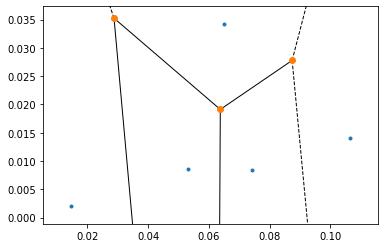

In [7]:
fig = plot_voronoi(bow)

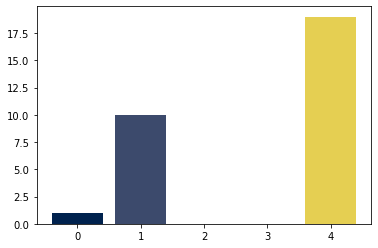

In [8]:
plot_persistence_bow(X_train[1], bow)